In [14]:
from __future__ import print_function, division
#virtualenv -p python3 venv

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [16]:
import os
import sys
base_module_path = os.path.abspath(os.path.join('..'))
if base_module_path not in sys.path:
    sys.path.append(base_module_path)
import cervix as c

In [17]:
ls ../data/train/

Type_1/ Type_2/ Type_3/


In [18]:
df = c.data.make_base_df()
tdf = c.data.make_test_df(); tdf.head()

,path,num_id
0,../data/test/0.jpg,0
1,../data/test/1.jpg,1
2,../data/test/10.jpg,10
3,../data/test/100.jpg,100
4,../data/test/101.jpg,101


In [19]:
df = c.processing.transform_save_imgs(df, c.processing.grayscale_resize); df.head()

,path,type,filetype,num_id,grayscale_resize_path
0,../data/train/Type_1/0.jpg,Type_1,jpg,0,../data/processed/grayscale_resize/train/0.jpg
1,../data/train/Type_1/10.jpg,Type_1,jpg,10,../data/processed/grayscale_resize/train/10.jpg
2,../data/train/Type_1/1013.jpg,Type_1,jpg,1013,../data/processed/grayscale_resize/train/1013.jpg
3,../data/train/Type_1/1014.jpg,Type_1,jpg,1014,../data/processed/grayscale_resize/train/1014.jpg
4,../data/train/Type_1/1019.jpg,Type_1,jpg,1019,../data/processed/grayscale_resize/train/1019.jpg


In [20]:
tdf = c.processing.transform_save_imgs(tdf, c.processing.grayscale_resize); tdf.head()

,path,num_id,grayscale_resize_path
0,../data/test/0.jpg,0,../data/processed/grayscale_resize/test/0.jpg
1,../data/test/1.jpg,1,../data/processed/grayscale_resize/test/1.jpg
2,../data/test/10.jpg,10,../data/processed/grayscale_resize/test/10.jpg
3,../data/test/100.jpg,100,../data/processed/grayscale_resize/test/100.jpg
4,../data/test/101.jpg,101,../data/processed/grayscale_resize/test/101.jpg


In [22]:
X, y = c.processing.random_forest_transform(df, 'grayscale_resize_path', grayscale=True)
print(X.shape)
print(y.shape)

(1481, 10000)
(1481,)


In [23]:
import scipy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(992, 10000)
(992,)
(489, 10000)
(489,)


In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_jobs=2,n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [40]:
rfc.score(X_test, y_test)  

0.49897750511247446

In [ ]:
df = c.processing.transform_save_imgs(df, c.processing.resize_100); df.head()

1131.1134.1136.1139.1154.1161.1168.1174.1179.1190.1194.1199.12.1202.1204.1220.1223.1226.1229.1230.1239.1245.1251.1273.1274.1279.1281.1285.1288.1289.129.13.1308.1314.1320.1324.1326.1336.1339.1344.1346.1370.138.1384.1389.139.1390.1393.14.1414.142.1422.1427.1430.1437.144.1440.1456.1464.1468.1473.148.160.171.176.180.181.

In [23]:
tdf100 = c.processing.transform_save_imgs(tdf, c.processing.resize_100); tdf100.head()

,path,num_id,grayscale_resize_path,resize_100_path
0,../data/test/0.jpg,0,../data/processed/grayscale_resize/test/0.jpg,../data/processed/resize_100/test/0.jpg
1,../data/test/1.jpg,1,../data/processed/grayscale_resize/test/1.jpg,../data/processed/resize_100/test/1.jpg
2,../data/test/10.jpg,10,../data/processed/grayscale_resize/test/10.jpg,../data/processed/resize_100/test/10.jpg
3,../data/test/100.jpg,100,../data/processed/grayscale_resize/test/100.jpg,../data/processed/resize_100/test/100.jpg
4,../data/test/101.jpg,101,../data/processed/grayscale_resize/test/101.jpg,../data/processed/resize_100/test/101.jpg


In [26]:
X100, y100 = c.processing.random_forest_transform(tdf100, 'resize_100_path', grayscale=False, test=True)
print(X100.shape)
print(y100.shape)

(512, 30000)
(512,)


In [25]:
X_trainrgb, X_testrgb, y_trainrgb, y_testrgb = train_test_split(
    Xrgb, yrgb, test_size=0.33, random_state=42)

NameError: name 'Xrgb' is not defined

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
score, ldf = cervix.submission.compute_losses('../data/dev_submission.csv')

In [ ]:
score

In [ ]:
ldf

In [27]:
c.data.check_image(df.resize_100_path[0])

AttributeError: 'DataFrame' object has no attribute 'resize_100_path'

../data/train/Type_1/10.jpg
(4128, 3096, 3)
[[[ 13  13  15]
  [  9  10  12]
  [  8  14  12]
  ..., 
  [ 27  29  42]
  [ 23  30  40]
  [ 23  30  40]]

 [[ 11  12  14]
  [  8  12  13]
  [ 10  16  14]
  ..., 
  [ 28  30  42]
  [ 26  33  43]
  [ 27  34  44]]

 [[ 10  12  11]
  [  9  13  12]
  [ 10  16  16]
  ..., 
  [ 28  30  42]
  [ 26  33  43]
  [ 27  34  44]]

 ..., 
 [[101 115 162]
  [102 116 163]
  [103 115 163]
  ..., 
  [ 21  26  45]
  [ 17  24  42]
  [ 17  26  43]]

 [[101 115 162]
  [102 114 162]
  [101 113 161]
  ..., 
  [ 19  24  43]
  [ 17  24  42]
  [ 15  24  41]]

 [[104 116 164]
  [102 114 162]
  [101 113 161]
  ..., 
  [ 20  25  44]
  [ 17  24  40]
  [ 15  24  41]]]


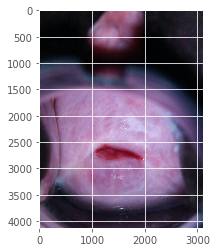

In [13]:
c.data.check_image(df.path[1])

../data/processed/grayscale_resize/train/10.jpg
(100, 100)
[[ 16  13  14 ...,  35  39  41]
 [ 16  13  15 ...,  39  39  34]
 [ 17  13  16 ...,  38  36  31]
 ..., 
 [ 89  87  98 ...,  98  81  69]
 [128 106  88 ...,  77  62  55]
 [147 145 130 ...,  56  42  37]]


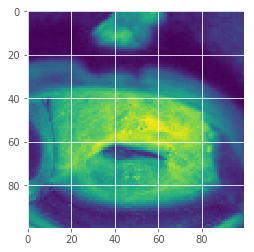

In [12]:
c.data.check_image(df.grayscale_resize_path[1])